This code uses built-in functions from the Image class in PIL to execute isometries on a given image. It snapshots the lens view after each isometry, then puts those images into a numpy array. It then calculates the persistent homology of the data. For different images, 'lens_sz' and 'intervals' should be ajusted.

In [1]:
# Imports
import numpy as np

# For image and video manipulation
from PIL import Image
import glob

# Persistent homology
from ripser import ripser
from persim import plot_diagrams

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Grab image from files
img_names = glob.glob('images/*.png')
img = Image.open(img_names[0])
img.show()

translation_snapshot() translates the plane by a vector a and returns the lens view afterwards. It takes an image (Image), the lens size (int), and the translation vector (tuple) that shifts the plane in the direction of the vector. 

In [3]:
def translation_snapshot(img, lens_sz, a):
    (x,y)=a
    x=-x #since x and y will shift the crop and not the plane, need to make sure it is going in right direction
    (length, height) = img.size
    lens_corner_x=length/2.0 - lens_sz/2.0 +x
    lens_corner_y=height/2.0 - lens_sz/2.0 +y
    ret_img = img.crop((lens_corner_x,lens_corner_y, lens_corner_x+lens_sz, lens_corner_y+lens_sz))
    
    #make sure didn't fall off of the image
    (ret_length, ret_height) = ret_img.size
    if (lens_corner_x<0 or lens_corner_y<0 or lens_corner_x+lens_sz>length or lens_corner_y+lens_sz>height):
        return False
    return ret_img

In [4]:
image_list = []
lens_sz = 60
degrees = np.linspace(0, 360, 10)

#this range should depend on image size and lens size such that the lens doesn't come off the page
intervals = np.linspace(-30, 30, 10)

# for each rotation, take several translations
for d in degrees:
    rot = img.rotate(d)
    for x in intervals:
        for y in intervals:
            image_list.append(translation_snapshot(rot, lens_sz, (x,y)))

In [5]:
# #if you want to store generated images in a file

# counter = 0
# for img in image_list:
#     img.save("images/dataset/"+str(counter)+".png")
#     counter+=1

In [6]:
# Turn images into array of data

data = []
for i in image_list:
    img_arr = np.asarray(i)
    data.append(img_arr.reshape(-1))
    
data = np.array(data)
np.random.shuffle(data) # randomly permute the image order
data = data[0:500] # take smaller set so that it runs faster

/Users/shannagoldman/anaconda3/envs/dreimac/lib/python3.8/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


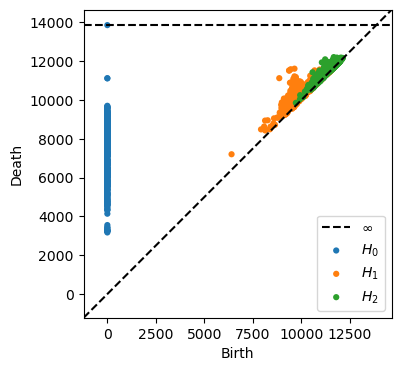

In [7]:
# Rips persistence of the data

res = ripser(data, maxdim=2,  coeff =2 )
dgms = res['dgms']
plt.figure(figsize = (4,4)) 
plot_diagrams(dgms)